TODO:
- Family Size
- Family Type
- Is Alone
- Fare per person
- Fare banding
- Title

In [421]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [422]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df.columns = df.columns.str.lower()
df.index.name = 'id'
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Drop Columns

In [423]:
# list of functions to run in Pipeline
transform_functions = []

In [424]:
def drop_ticket_column(df):
    return df.drop([ 'ticket' ], axis=1)

transform_functions.append(drop_ticket_column)

df = drop_ticket_column(df)

### Fare

In [426]:
df.sort_values('cabin', ascending=False).head(50)

,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
id,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,35.5000,T,S
395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,16.7000,G6,S
206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,10.4625,G6,S
252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,10.4625,G6,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S
184,1,2,"Becker, Master. Richard F",male,1.0,2,1,39.0000,F4,S
619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,39.0000,F4,S
777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,7.7500,F38,Q
67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,10.5000,F33,S


# Missing Data

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [367]:
# columns with NA
df.isnull().sum().to_frame()

,0
survived,0
pclass,0
name,0
sex,0
age,177
sibsp,0
parch,0
fare,0
cabin,687
embarked,2


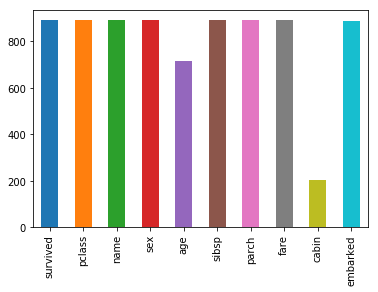

In [368]:
df.notnull().sum().plot(kind='bar')

### Replace Name by Title

In [369]:
def replace_name_by_title(df):
    df['title'] = df['name'].str.extract('([A-Za-z]+)\.',expand=True)

    mapping = {'Mlle': 'Miss',
               'Major': 'Mr',
               'Col': 'Mr',
               'Sir': 'Mr',
               'Don': 'Mr',
               'Mme': 'Mrs',
               'Jonkheer': 'Mr',
               'Lady': 'Mrs',
               'Capt': 'Mr',
               'Countess': 'Mrs',
               'Ms': 'Miss',
               'Dona': 'Mrs'}

    df.replace({'title': mapping}, inplace=True)
    df.drop('name', axis=1, inplace=True)
    return df

transform_functions.append(replace_name_by_title)

df = replace_name_by_title(df)

### Missing Age

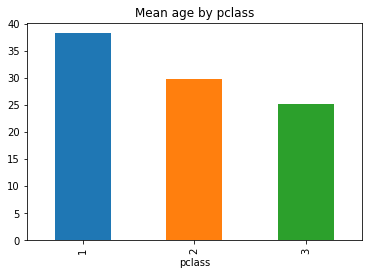

In [370]:
mean_ages_by_pclass = df.groupby('pclass')['age'].mean()
mean_ages_by_pclass.plot(kind='bar', title='Mean age by pclass')

Impute age by mean within pclass

In [371]:
# df['age'] = df.groupby("pclass")['age'].transform(lambda x: x.fillna(x.mean()))

In [372]:
def impute_age_row_by_pclass(row):
    if np.isnan(row['age']):
        return mean_ages_by_pclass[row['pclass']]
    else:
        return row['age']
    
def impute_age_pclass(df):
    df['age_pclass'] = df.apply(impute_age_row_by_pclass, axis=1)
    return df

transform_functions.append(impute_age_pclass)

df = impute_age_pclass(df)

### Use Titles to fix Age

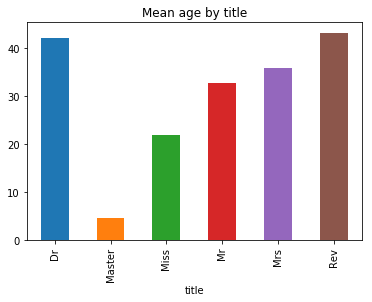

In [373]:
mean_ages_by_title = df.groupby('title')['age'].mean()
mean_ages_by_title.plot(kind='bar', title='Mean age by title')

In [374]:
def impute_age_row_by_title(row):
    if np.isnan(row['age']):
        return mean_ages_by_title[row['title']]
    else:
        return row['age']
    
def impute_age_title(df):
    df['age_title'] = df.apply(impute_age_row_by_title, axis=1)
    df.drop('age', axis=1, inplace=True)
    return df

transform_functions.append(impute_age_title)

df = impute_age_title(df)

In [375]:
df[df['age_pclass'] != df['age_title']].head()

,survived,pclass,sex,sibsp,parch,fare,cabin,embarked,title,age_pclass,age_title
id,,,,,,,,,,,
6,0,3,male,0,0,8.4583,NaN,Q,Mr,25.14062,32.740148
18,1,2,male,0,0,13.0000,NaN,S,Mr,29.87763,32.740148
20,1,3,female,0,0,7.2250,NaN,C,Mrs,25.14062,35.873874
27,0,3,male,0,0,7.2250,NaN,C,Mr,25.14062,32.740148
29,1,3,female,0,0,7.8792,NaN,Q,Miss,25.14062,21.845638


### Missing Fare (on Test set)

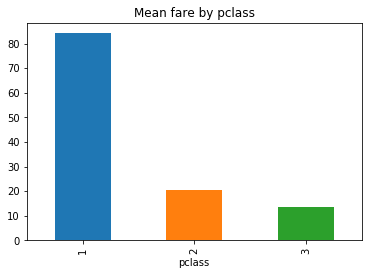

In [376]:
mean_fare_by_pclass = df.groupby('pclass')['fare'].mean()
mean_fare_by_pclass.plot(kind='bar', title='Mean fare by pclass')

Impute fare by mean within pclass

In [377]:
# df['fare'] = df.groupby("pclass")['fare'].transform(lambda x: x.fillna(x.mean()))

In [378]:
def impute_fare_on_row(row):
    if np.isnan(row['fare']):
        return mean_fare_by_pclass[row['pclass']]
    else:
        return row['fare']

def impute_fare(df):
    df['fare'] = df.apply(impute_fare_on_row, axis=1)
    return df

impute_fare(df)

transform_functions.append(impute_fare)

### Transform Sex

In [379]:
def categorize_sex(df):
    df['female'] = ((df['sex'] == 'female') * 1)
    df.drop('sex', axis=1, inplace=True)
    return df

categorize_sex(df)

transform_functions.append(categorize_sex)

In [380]:
df.head()

,survived,pclass,sibsp,parch,fare,cabin,embarked,title,age_pclass,age_title,female
id,,,,,,,,,,,
1,0,3,1,0,7.2500,NaN,S,Mr,22.0,22.0,0
2,1,1,1,0,71.2833,C85,C,Mrs,38.0,38.0,1
3,1,3,0,0,7.9250,NaN,S,Miss,26.0,26.0,1
4,1,1,1,0,53.1000,C123,S,Mrs,35.0,35.0,1
5,0,3,0,0,8.0500,NaN,S,Mr,35.0,35.0,0


# EDA

In [381]:
df.describe()

,survived,pclass,sibsp,parch,fare,age_pclass,age_title,female
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,29.292875,29.806782,0.352413
std,0.486592,0.836071,1.102743,0.806057,49.693429,13.210527,13.285614,0.477990
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,22.000000,21.845638,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,26.000000,30.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,37.000000,35.873874,1.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,80.000000,80.000000,1.000000


In [382]:
df.groupby('survived').mean()

,pclass,sibsp,parch,fare,age_pclass,age_title,female
survived,,,,,,,
0,2.531876,0.553734,0.329690,22.117887,29.819165,30.761064,0.147541
1,1.950292,0.473684,0.464912,48.395408,28.448040,28.274908,0.681287


Text(0.5,1,'Correlations Among Features')

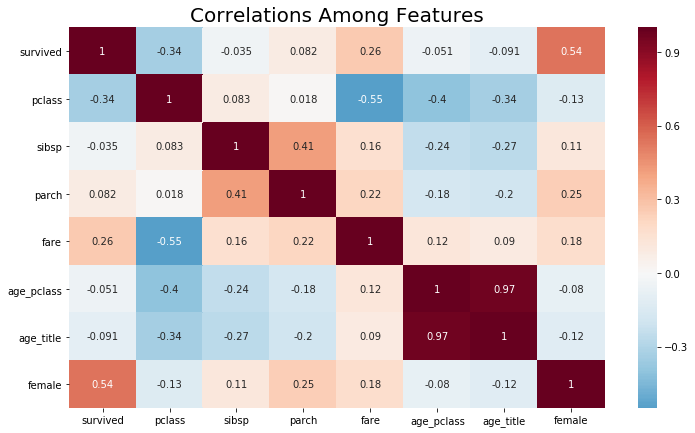

In [383]:
plt.subplots(figsize = (12,7))
sns.heatmap(df.corr(), annot=True, cmap="RdBu_r", center=0)
plt.title("Correlations Among Features", fontsize = 20)

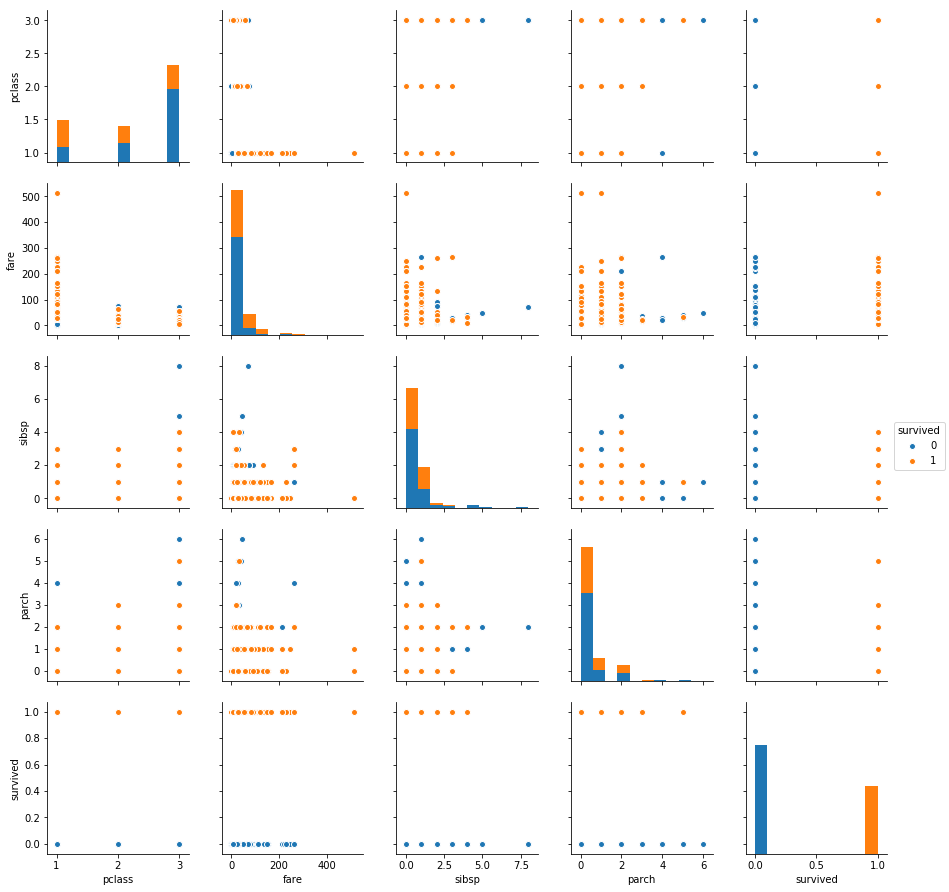

In [70]:
sns.pairplot(df[['pclass', 'sex', 'fare', 'sibsp', 'parch', 'survived']], hue='survived')

## Survival by Gender

([<matplotlib.axis.XTick at 0x1a21bc3400>,
 <a list of 2 Text xticklabel objects>)

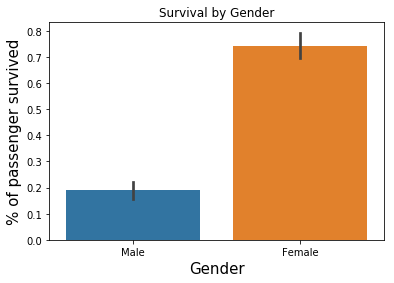

In [397]:
sns.barplot(x = "female", y = "survived", data=df)
plt.title("Survival by Gender")
labels = ['Male', 'Female']
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.xticks(sorted(df.female.unique()), labels)

## Survival by Class

Text(0.5,0,'Class')

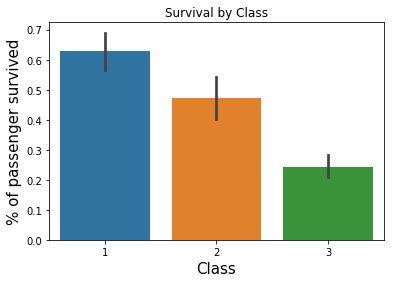

In [399]:
sns.barplot(x = "pclass", y = "survived", data=df)
plt.title("Survival by Class")
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Class",fontsize = 15)

### Survival by Fare

Text(0.5,1,'Survival by Fare')

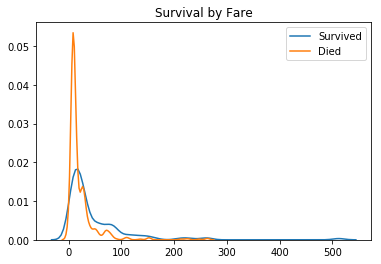

In [411]:
sns.kdeplot(df[df['survived']==1]["fare"], label="Survived")
sns.kdeplot(df[df['survived']==0]["fare"], label="Died")

plt.title("Survival by Fare")

## Survival by Age

Text(0.5,1,'Survival by Age (imputed with title)')

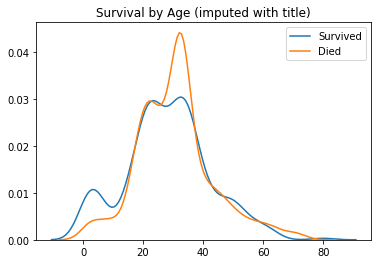

In [416]:
sns.kdeplot(df[df['survived']==1]["age_title"], label="Survived")
sns.kdeplot(df[df['survived']==0]["age_title"], label="Died")

plt.title("Survival by Age (imputed with title)")

Text(0.5,1,'Survival by Age (imputed with class)')

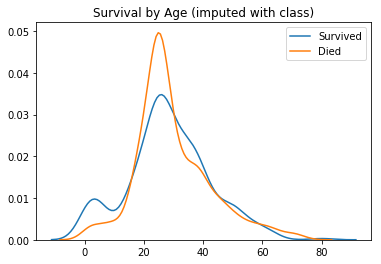

In [415]:
sns.kdeplot(df[df['survived']==1]["age_pclass"], label="Survived")
sns.kdeplot(df[df['survived']==0]["age_pclass"], label="Died")

plt.title("Survival by Age (imputed with class)")

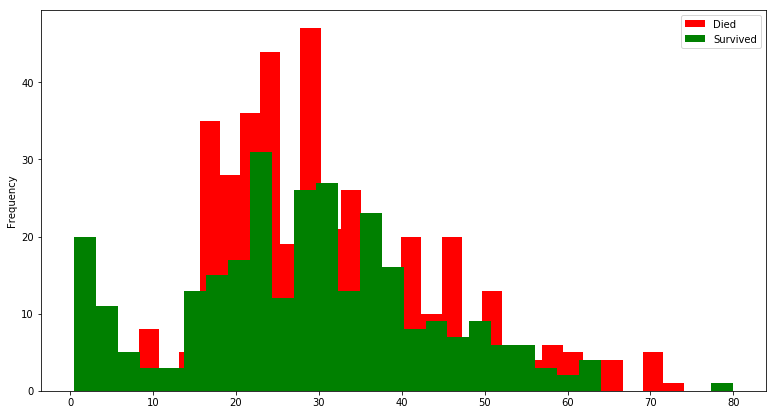

In [10]:
plt.figure(figsize=(13,7))
df[df['survived']==0]['age'].plot(bins=30, kind='hist', label='Died', color='red') 
df[df['survived']==1]['age'].plot(bins=30, kind='hist', label='Survived', color='green') 
plt.legend()

## Fare


## Fare Outliers

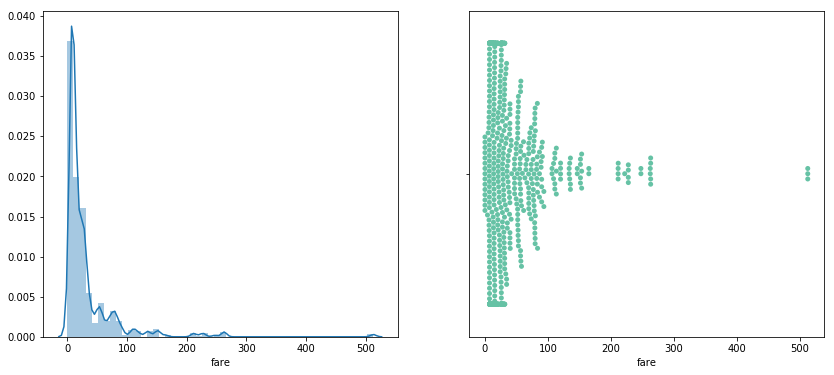

In [73]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.distplot(df['fare'])

plt.subplot(1, 2, 2)
sns.swarmplot(x='fare', hue='survived', data=df, hue_order=[0,1], palette="Set2", orient='h')

In [54]:
q1, q3 = df['fare'].quantile([0.25, 0.75])
iqr = q3 - q1
fence_high = q3 + 1.5*iqr

count = (df['fare'] > fence_high).sum()
print("Outliers on Fare above: ", fence_high)


Fare outliers above:  65.6344


116

In [76]:
# Exclude fare above 100

In [77]:
df = df[df['fare'] <= 100]

## Transform

In [79]:
df2 = df.copy()

### Mising Embarked

In [88]:
df2[df2['embarked'].isnull()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [89]:
df2 = pd.get_dummies(df2, columns=['embarked'])

In [90]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
df2.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked_C', 'embarked_Q', 'embarked_S', 'female'],
      dtype='object')

In [93]:
# X = df[[ 'female', 'pclass', 'fare', 'sibsp', 'parch' ]]

features = [ 'female', 'pclass', 'fare', 'age', 'sibsp', 'parch', 'embarked_C', 'embarked_Q', 'embarked_S' ]
target = 'survived' 
cols = features + [ target ]

final_df = df2[cols]
X = df2[features]
y = df2[target]

## Classifiers Evaluation

In [94]:
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import train_test_split

def classifier_accuracy(classifier, X, y):    
    accuracies = []
    
    for train_index, test_index in RepeatedKFold(n_splits=5, n_repeats=5).split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = classifier().fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        accuracies.append((y_pred == y_test).sum() / len(y_test))

    return np.mean(accuracies)

In [95]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [ LogisticRegression, SVC, GradientBoostingClassifier, DecisionTreeClassifier, RandomForestClassifier ]

for classifier in classifiers:
    start_time = time.time()
    accuracy = classifier_accuracy(classifier, X, y)
    end_time = time.time()
    
    duration = end_time - start_time
    print("{}%  {}s  {}".format(round(accuracy*100,1), round(duration,2), classifier.__name__))

79.7%  0.08s  LogisticRegression
71.4%  0.35s  SVC
82.7%  1.4s  GradientBoostingClassifier
77.8%  0.08s  DecisionTreeClassifier
80.1%  0.35s  RandomForestClassifier


## Tune GradientBoosting

In [96]:
from sklearn.model_selection import GridSearchCV 
from sklearn import cross_validation, metrics

/Users/rgabillet/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



Model Report
Accuracy : 0.8974
AUC Score (Train): 0.945847
CV Score : Mean - 0.8591977 | Std - 0.03838705 | Min - 0.7970737 | Max - 0.9023288


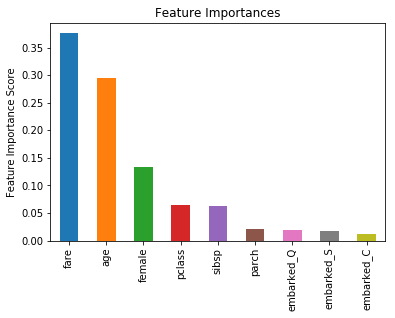

In [116]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    target = 'survived'

    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


# Step 1
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, final_df, features)
# 

In [117]:
# Step 2: exclude non-significant features and determine optimal n_estimators

target = 'survived'
features = [ 'female', 'pclass', 'fare', 'age', 'sibsp' ]

param_test2 = {'n_estimators':range(20,200,5)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(final_df[features], final_df[target])

# gsearch2.grid_scores_
gsearch2.best_params_, gsearch1.best_score_

({'n_estimators': 185}, 0.833997497574179)

In [118]:
# Step 3: determine optimal parameters

param_test3 = {'max_depth':range(8,18,1),
               'min_samples_split':range(120,280,20)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=185, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(final_df[features],df[target])

#gsearch3.grid_scores_
gsearch3.best_params_, gsearch2.best_score_

({'max_depth': 15, 'min_samples_split': 140}, 0.833997497574179)


Model Report
Accuracy : 0.926
AUC Score (Train): 0.980803
CV Score : Mean - 0.8670849 | Std - 0.04015768 | Min - 0.7933967 | Max - 0.9050866


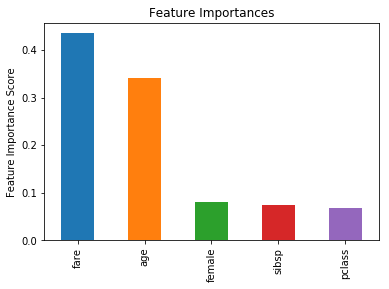

In [119]:
final_model = gsearch3
modelfit(final_model.best_estimator_, final_df, features)

# Submission

In [120]:
!head test.csv

In [121]:
test_df = pd.read_csv('test.csv', index_col='PassengerId')
test_df.columns = test_df.columns.str.lower()
test_df.index.name = 'id'
test_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Categorical columns

In [122]:
df['embarked'] = df['embarked'].astype('category')

#### Fix Age

In [123]:
def update_age(row):
    if np.isnan(row['age']):
        return mean_ages_by_pclass[row['pclass']]
    else:
        return row['age']
    
test_df['age'] = test_df.apply(update_age, axis=1)

#### Fix Embarked

In [124]:
test_df = pd.get_dummies(test_df, columns=['embarked'])

#### Fix Fare

In [125]:
def impute_fare(row):
    if np.isnan(row['fare']):
        return mean_fare_by_pclass[row['pclass']]
    else:
        return row['fare']
    
test_df['fare'] = test_df.apply(impute_fare, axis=1)

#### Select Features

In [127]:
X_test = test_df[features]
X_test.head()

,female,pclass,fare,age,sibsp
id,,,,,
892,0,3,7.8292,34.5,0
893,1,3,7.0000,47.0,1
894,0,2,9.6875,62.0,0
895,0,3,8.6625,27.0,0
896,1,3,12.2875,22.0,1


In [128]:
y_pred = final_model.predict(X_test)

In [129]:
!head gender_submission.csv

In [130]:
submission_df = pd.DataFrame({ 'PassengerId': X_test.index, 'Survived': y_pred }).set_index('PassengerId')
submission_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [132]:
submission_df.to_csv('remi_submission_v2.csv')

In [133]:
submission_df['Survived'].value_counts()

0    263
1    155
Name: Survived, dtype: int64